# **TP 2 : Opérations ponctuelles et transformations géométriques**

**Nom & Prénom** : Imad Anis KHEFFACHE



**Spécialité** :  Data Science & Intelligence Artificielle

In [170]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
import skimage.measure as skm
from skimage.transform import resize
from skimage.transform import rotate

# **Manipulation 1**

1-2/ Lecture et conversion en niveaux de gris:

(480, 512, 3)
uint8


Text(0.5, 1.0, 'Image flower en niveaux de gris')

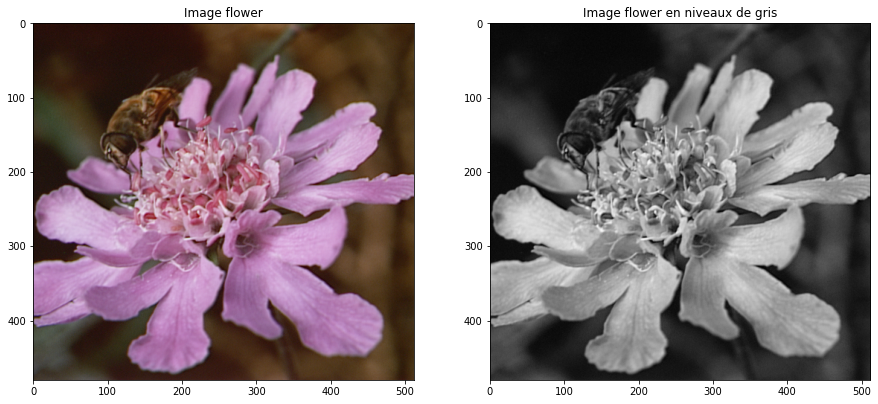

In [174]:
plt.figure(figsize = (15, 15))     #Pour réajuster l'affichage

image=cv.imread('flower.bmp')
image=cv.cvtColor(image, cv.COLOR_BGR2RGB)    # Inversion des canaux de niveaux de gris car la fct les inverse
print(image.shape) 
print(image.dtype)      # Type du codage utilisé dans l'image
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Image flower")

image_gris=cv.cvtColor(image, cv.COLOR_BGR2GRAY)      # Conversion en niveaux de gris
plt.subplot(1,2,2)
plt.imshow(image_gris, cmap='gray')
plt.title("Image flower en niveaux de gris")

3/a/ Calcul et affichage de l'histogramme: 

Text(0.5, 1.0, 'Histogramme des niveaux de gris')

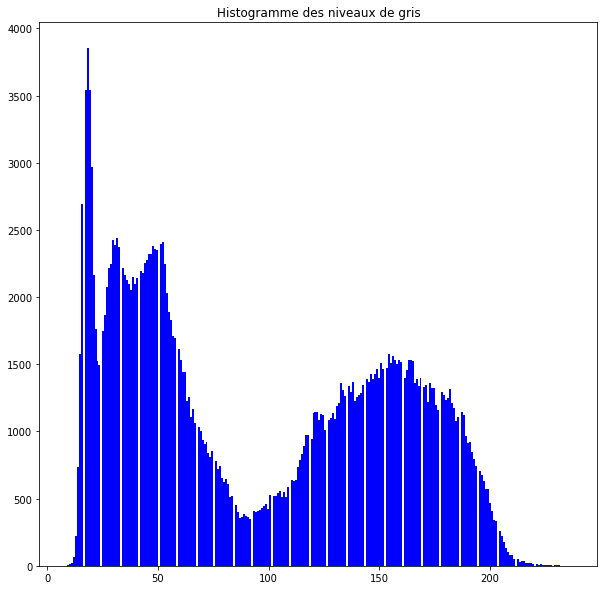

In [175]:
plt.figure(figsize=(10,10))

plt.hist(image_gris.ravel(), bins=256, color='blue')     #256 bins puisqu'il y a 256 niveaux de gris
plt.title('Histogramme des niveaux de gris')

3/b/ Calcul et affichage de l'histogramme normalisé: 

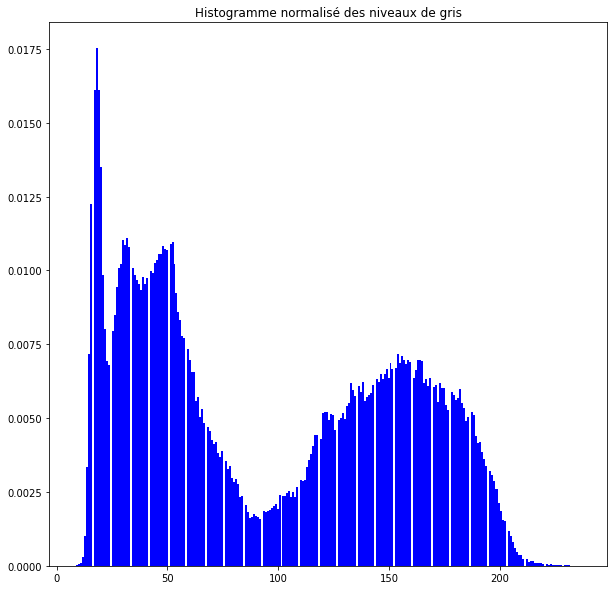

In [176]:
plt.figure(figsize=(10,10))

plt.hist(image_gris.ravel(), bins=256, color='blue', density=True)     #256 bins puisqu'il y a 256 niveaux de gris
# On affecte True à l'argument density pour dire qu'on veut une densité de probabilité et donc un histogramme normalisé
plt.title('Histogramme normalisé des niveaux de gris')
plt.show()

**Commentaire:** </br> On remarque qu'il y a des niveaux de gris qui n'existent pas dans l'image (les vides au milieu), l'histogramme est creusé un peu au centre, il ne contient pas les valeurs du blanc en haut de l'échelle et les valeurs en noir en bad de l'échelle mais beaucoup de concentraion entre les niveaux de gris de 0 à 50; et donc en conclusion on dit que le contraste de l'image peut-être amélioré et qu'elle est légèrement grisâtre. Cet histogramme définit une densité de probabilité.

4/ Histogramme normalisé cumulé:

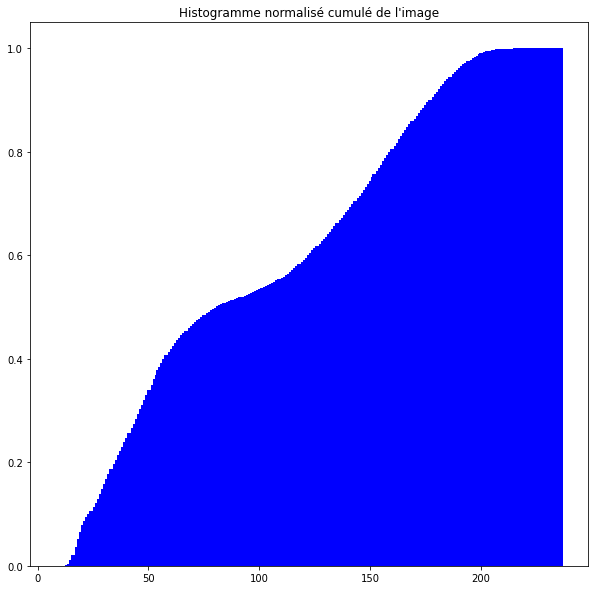

In [177]:
plt.figure(figsize=(10,10))      # Réajuster l'affichage de l'image

plt.hist(image_gris.ravel() , bins=256 , density=True , cumulative = True , color='blue')     #256 bins puisqu'il y a 256 niveaux de gris
# On affecte True à l'argument density pour dire qu'on veut une densité de probabilité et donc un histogramme normalisé
# On affecte True à l'argument cumulative pour dire qu'on veut une fonction de répartition de probabilité et donc un histogramme cumulé
plt.title('Histogramme normalisé cumulé de l\'image')
plt.show()

**Commentaire:** </br> L'histogramme cumulé représente 2 pentes, ce qui justifie la présence des niveaux de gris sur 2 parties de leur intervalle de répartition; quant aux autres zones qui sont plus ou plates ou invariantes; elles caractérisent l'absence des niveaux de gris de cette partie des niveaux de gris. L'histogramme cumulé représente la fonction de répartition de probabilité des niveaux de gris dans notre image.

5/ Réalisation d'une égalisation d'hisogramme:

<ipython-input-178-e1b7ef8cacd9>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)      # A titre de comparaison


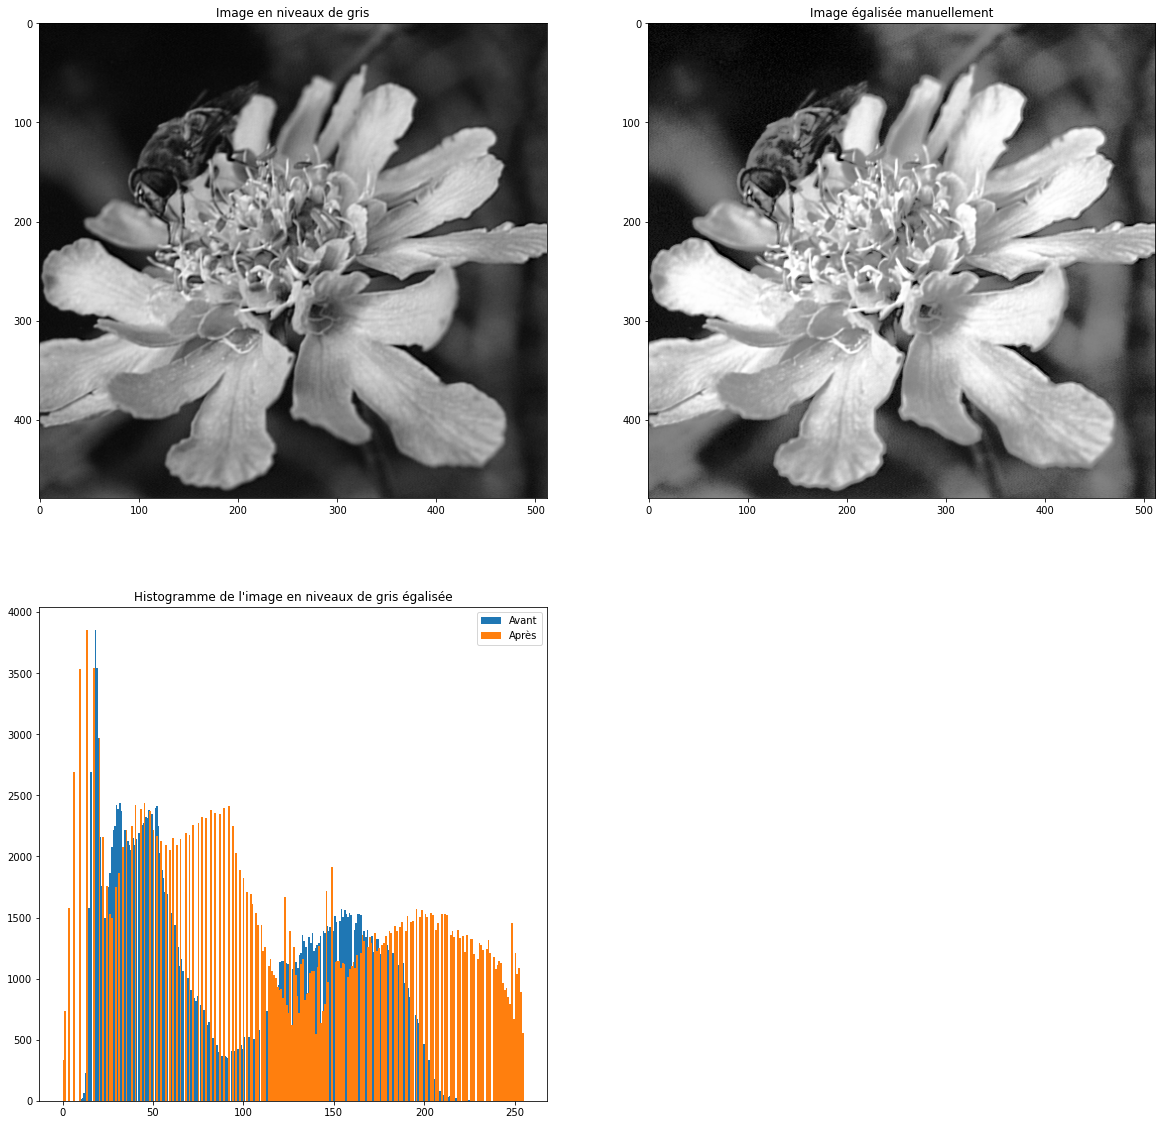

In [178]:
plt.figure(figsize=(20, 20))

# Transformation de l'histogramme dans la libraire pandas pour pouvoir mener à bien sa manipulation
def égalisation(img, dep=False):
  hist, bin_edges=np.histogram(img, 256, [0, 256])
  hist_den=hist/np.sum(hist) # histogram normalisé
  if dep==False:
    hist_norm_cum=np.cumsum(hist_den) # histogram normalisé cumulé
  else:
    hist1, bin_edges1=np.histogram(image_gris, 256, [0, 256])
    hist_den1=hist1/np.sum(hist1) # histogram normalisé
    hist_norm_cum=np.cumsum(hist_den1)
  new=np.round(hist_norm_cum*255).astype('uint8') #formule degalisation tq gmax=255 en image niveau de gris
  image_egal=new[img]
  return image_egal

plt.subplot(2,2,1)
plt.imshow(image_gris, cmap='gray')
plt.title('Image en niveaux de gris')
plt.subplot(2,2,2)
plt.imshow(égalisation(image_gris), cmap='gray')
plt.title('Image égalisée manuellement')
plt.subplot(2,2,3)
plt.hist(image_gris.ravel(), bins=256, label='Avant')
plt.title('Histogramme de l\'image en niveaux de gris')
plt.subplot(2,2,3)      # A titre de comparaison
plt.hist(égalisation(image_gris).ravel(), bins=256, label='Après')
plt.title('Histogramme de l\'image en niveaux de gris égalisée')
plt.legend()

**Commentaire:** </br> L'image obtenue après égalisaition est plus contrastée que l'image originale, ceci se reflète aussi sur l'histogramme après égalisation car il est plus applati que l'histogramme original (il est à noter qu'on veut se rapprocher d'un histogramme plat car il est l'histogramme parfait en termes de caractéristiques visuelles, contraste, luminance...etc). </br>
On remarque aussi qu'il y a des niveaux de gris qui existaient dans l'image originale n'existent plus dans l'image apès égalisation et cela est justifié par le fait qu'une image est constitué d'un nombre constant de pixels qui ne pourra pas changer, donc on doit chercher à modifier leurs distributions et valeurs et non pas leurs nombres et donc c'est pour cela qu'on se retrouve obligés d'enlever des fois un niveau de gris (ou diminuer son effectif) pour garder la dimension de l'image intacte.

6/ Égaliser avec cv.equalizeHist:

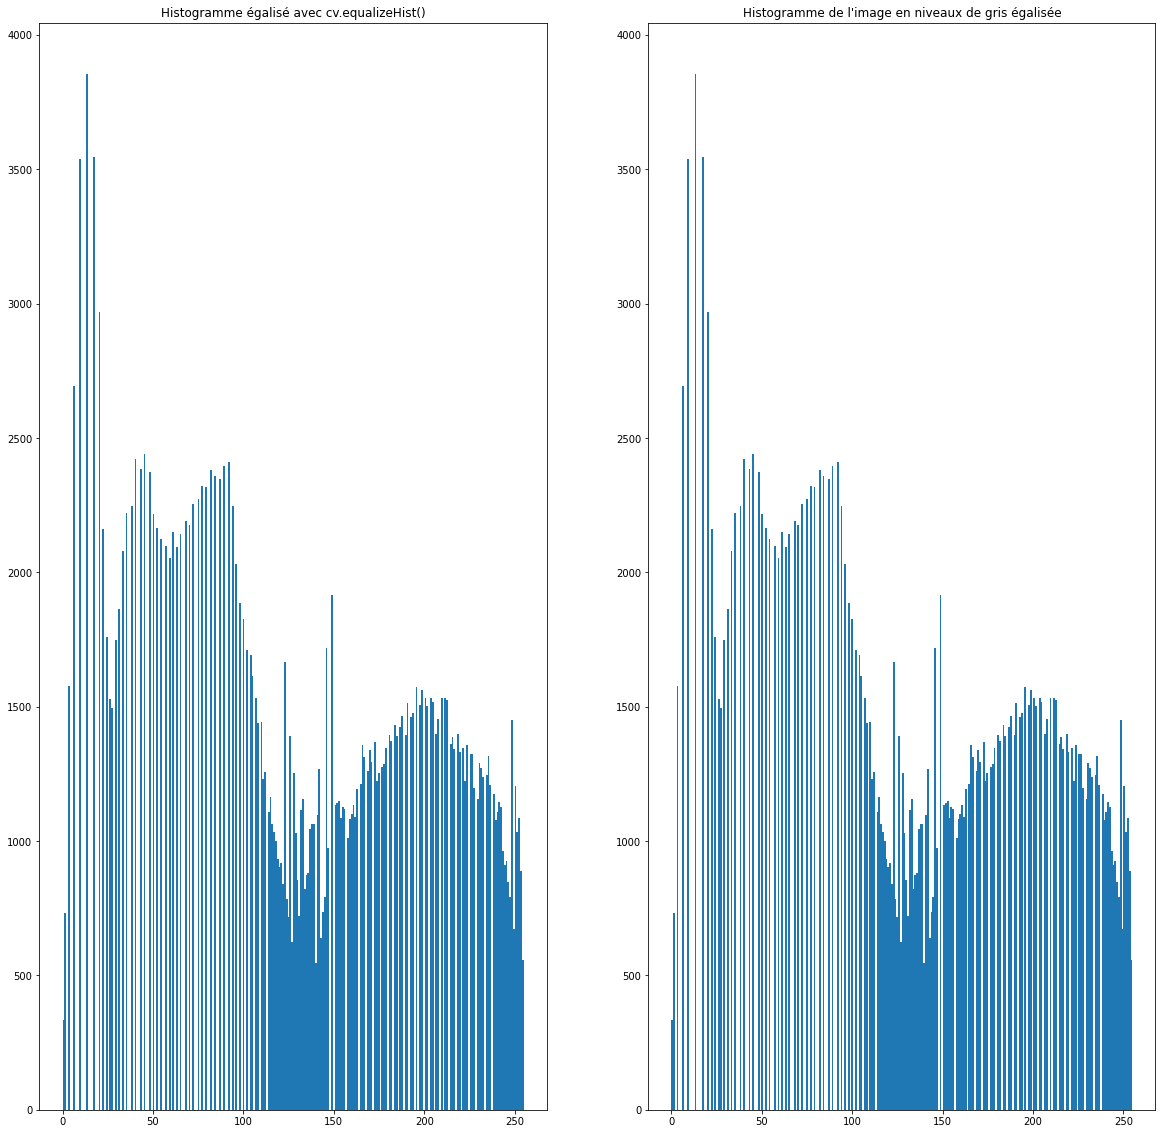

In [179]:
plt.figure(figsize=(20, 20))

image_eg_cv=cv.equalizeHist(image_gris)
plt.subplot(1,2,1)
plt.hist(image_eg_cv.ravel(), bins=256)
plt.title('Histogramme égalisé avec cv.equalizeHist()')

plt.subplot(1,2,2)
plt.hist(égalisation(image_gris).ravel(), bins=256)
plt.title('Histogramme de l\'image en niveaux de gris égalisée')
plt.show()

**Comparaison:** </br>Les histogrammes obtenus par les 2 alternatives d'égalisation sont pratiquement identiques, des fois on retrouve une certaine différence dans le nombre d'occurence de chaque niveau de gris mais cette dernière n'est pas flagrante; les différences entre les 2 alternantives sont pratiquement négligeables. Cela est sûrement dû au fonctionnement interne de la fonction cv.equalizeHist() </br>
</br>
Si on retrace l'histogramme cumulé, on remarquera que les zones qui étaient stables dans l'image originale le sont moins car leurs distributions (valeurs) ont été affectées par l'égalisation.

7/ Égalisation indépendante des 3 composantes et calcul d'entropie:

Text(0.5, 1.0, 'Image égalisée avec chaque canal indépendamment')

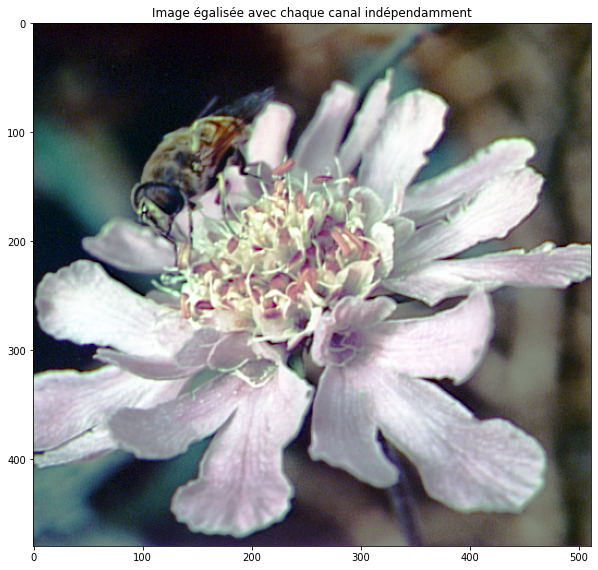

In [182]:
plt.figure(figsize=(10, 10))

R,G,B=cv.split(image)
R=cv.equalizeHist(R)
G=cv.equalizeHist(G)
B=cv.equalizeHist(B)

egalisé=cv.merge([B,G,R])     # la fonction merge inverse l'ordre par défaut
im_ég_indep=cv.cvtColor(egalisé, cv.COLOR_BGR2RGB)
plt.imshow(im_ég_indep)
plt.title('Image égalisée avec chaque canal indépendamment')

In [183]:
# Calcul de l'entropie

entrp=skm.shannon_entropy(im_ég_indep)
print('Lentropie de l\'image dont chacun des canaux est égalisé indépendamment est: ', entrp)

Lentropie de l'image dont chacun des canaux est égalisé indépendamment est:  7.765114052922554


8/ Égalisation par rapport à l'histogramme en niveaux de gris et calcul de l'entropie:

Text(0.5, 1.0, 'Image égalisée chaque canal par rapport aux niveaux de gris')

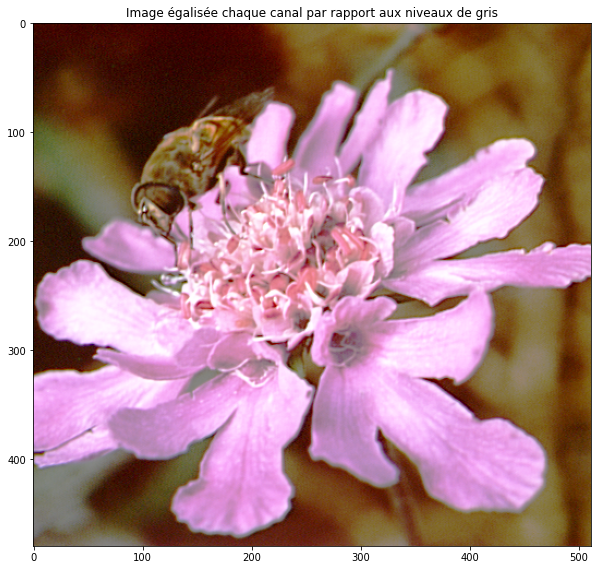

In [184]:
plt.figure(figsize=(10, 10))

R1,G1,B1=cv.split(image)

R1_eg=égalisation(R1, dep=True)   #Si dep=True, ça veut dire l'égalisation se fera par rapport à l'histogramme des niveaux de gris
G1_eg=égalisation(G1, dep=True)  
B1_eg=égalisation(B1, dep=True)

egalisé_dep=cv.merge([B1_eg,G1_eg,R1_eg])
im_ég_dep=cv.cvtColor(egalisé_dep, cv.COLOR_BGR2RGB)
plt.imshow(im_ég_dep)
plt.title('Image égalisée chaque canal par rapport aux niveaux de gris')

In [186]:
# Cacul de l'entropie

entrp1=skm.shannon_entropy(im_ég_dep)
print('Lentropie de l\'image dont chaque canal est égalisé avec l\'histogramme des niveaux de gris: ', entrp1)

Lentropie de l'image dont chaque canal est égalisé avec l'histogramme des niveaux de gris:  7.160812585918185


9/ Comparaison:

Les couleurs de l'image avec égalisation indépendante (chaque canal seul) donne un résultat très fake, on se rend compte que les couleurs sont faussées et que même si le contraste est quelque part amélioré mais l'information de le couleur est perude. Par contre, dans l'égalisation par rapport à l'histogramme des niveaux de gris on remarue que les couleurs ont été préservées, le contraste amélioré et les couleurs sont belles; donc on concule que l'égalisation par rapport aux niveaux de gris est la plus idéale.</br>
Quant à l'entropie, elle ne varie pas considérablement d'une alternative à l'autre, ce qui veut dire que presque toute l'information de l'image a été conservée. On note aussi que l'entropie ne varie pas trop entre les 2 alternatives malgré que les images ont visuellement très différentes donc on dit que l'entropie n'est pas un critère de jugement de qualité d'une égalisation (elle dépend que dr l'histogramme normalisé et ne donne aucune information visuelle).

Text(0.5, 1.0, 'Image égalisée chaque canal par rapport aux niveaux de gris')

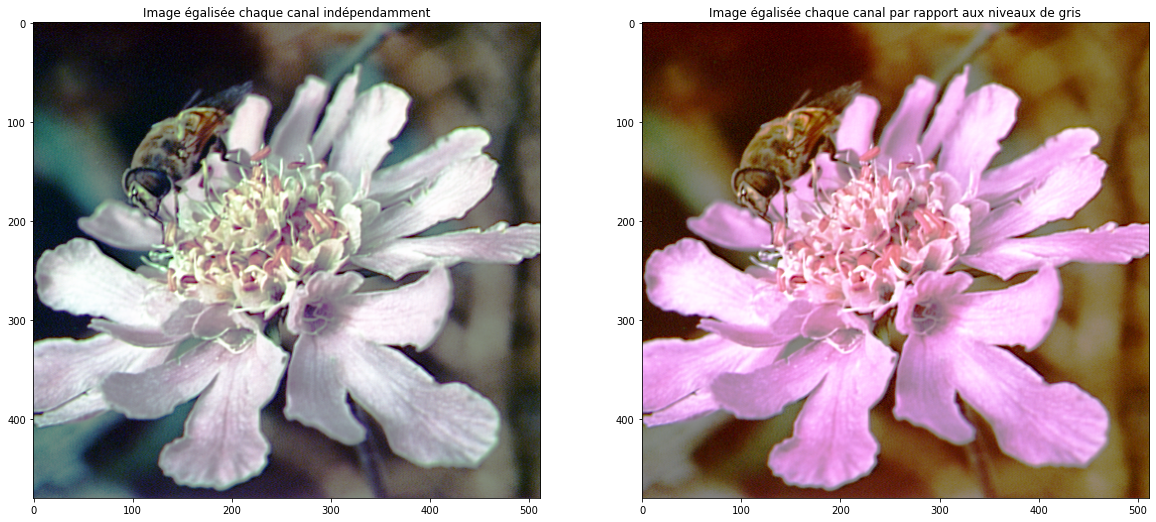

In [187]:
plt.figure(figsize=(20, 20))

plt.subplot(1,2,1)
plt.imshow(im_ég_indep)
plt.title('Image égalisée chaque canal indépendamment')
plt.subplot(1,2,2)
plt.imshow(im_ég_dep)
plt.title('Image égalisée chaque canal par rapport aux niveaux de gris')

10/ Visualisation l'image et égalisation de son histogramme:

Text(0.5, 1.0, 'Image égalisée')

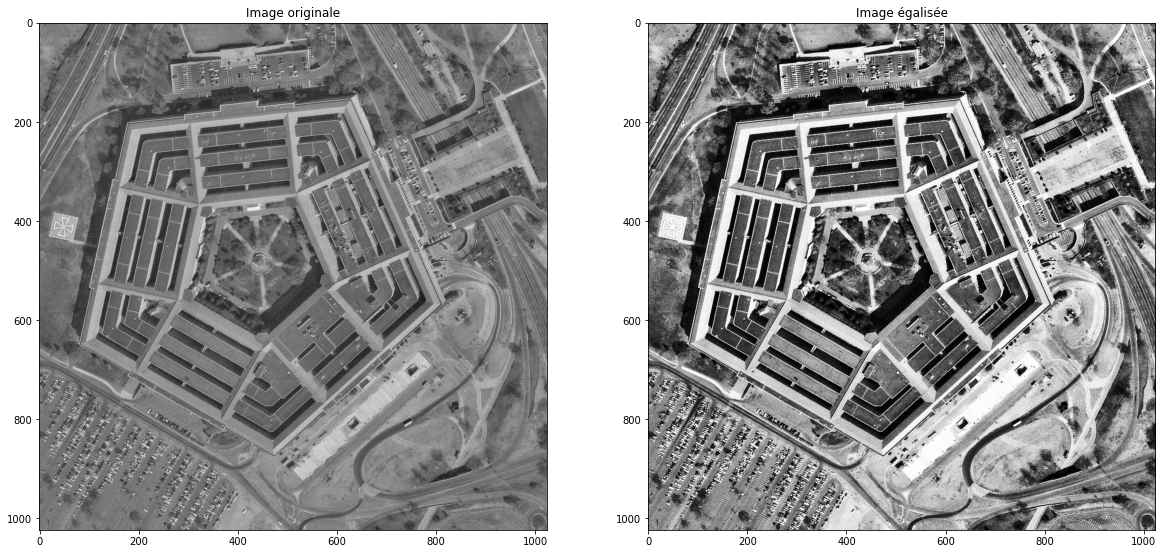

In [188]:
plt.figure(figsize = (20, 20))     #Pour réajuster l'affichage

image2=cv.imread('pentagon.tif', cv.IMREAD_GRAYSCALE)     #Lire l'image en niveaux de gris
plt.subplot(1,2,1)
plt.imshow(image2, cmap='gray')
plt.title("Image originale")

pentagon_eg=cv.equalizeHist(image2)
plt.subplot(1,2,2)
plt.imshow(pentagon_eg, cmap='gray')
plt.title("Image égalisée")

**Commentaire:** </br>
L'égalisation de l'histogramme du pentagon renforce la netteté de l'image en augmentant le contraste grâce à une répartition étendue des niveaux de gris. </br>
Cette opération permet de passer d'une image uniformément terne à une image contrastée qui met en évidence les zones claires et foncées.

11/ Histogramme matching:

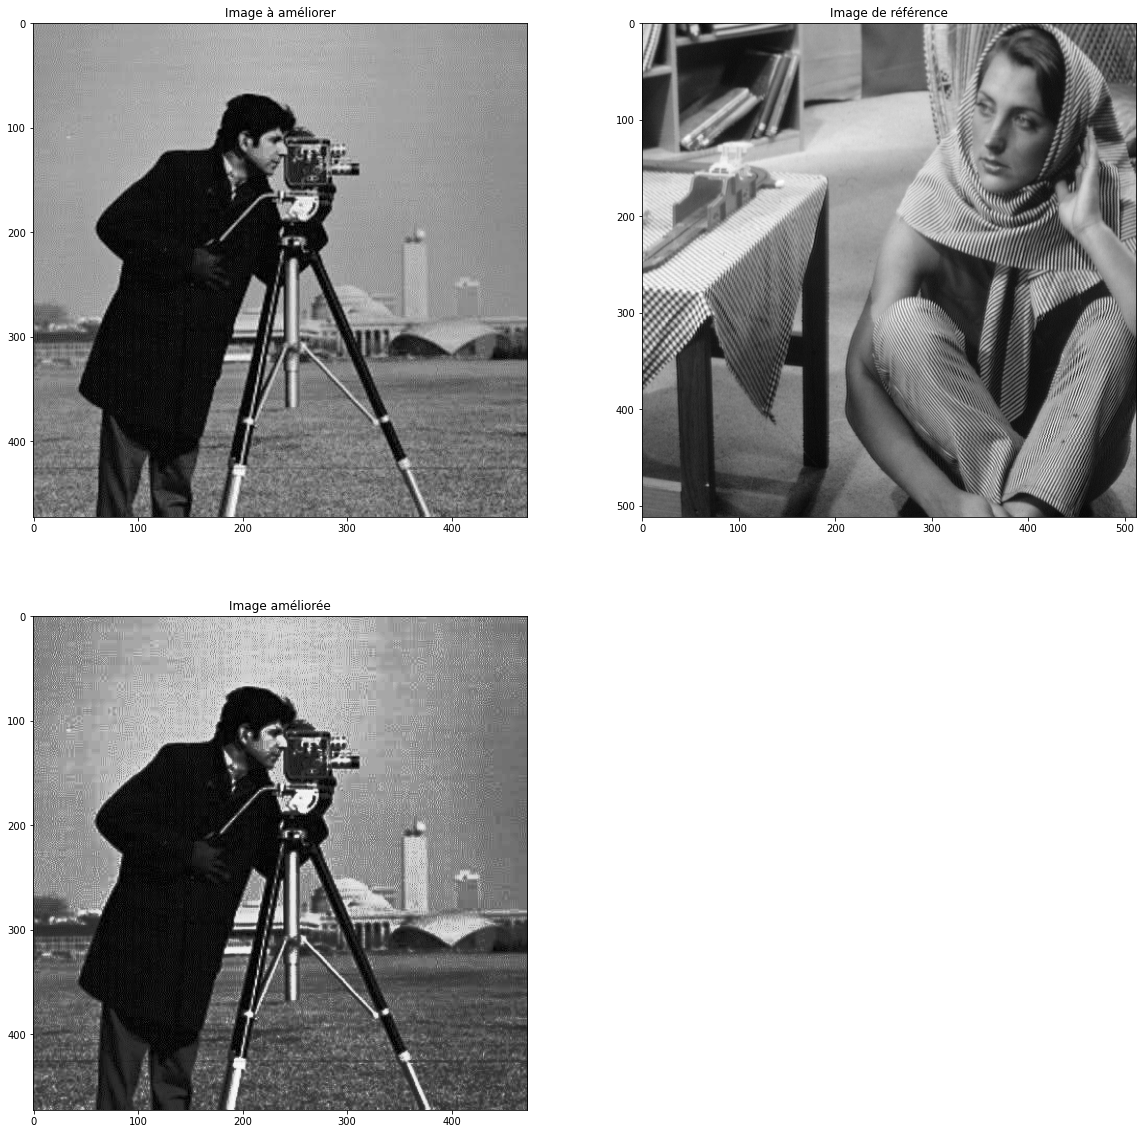

In [190]:
plt.figure(figsize = (20, 20))     #Pour réajuster l'affichage

# Histogramme matching, c'est pour ramener l'histogramme d'une image à une autre qui a des caractéristiques désirées (notamment en terme de contraste)

im1=cv.imread('cameraman.jpg', cv.IMREAD_GRAYSCALE)
im2=cv.imread('barbara.png', cv.IMREAD_GRAYSCALE)
plt.subplot(2,2,1)
plt.title('Image à améliorer')
plt.imshow(im1, cmap='gray')
plt.subplot(2,2,2)
plt.title('Image de référence')
plt.imshow(im2, cmap='gray')

im1_match=match_histograms(im1,im2)      #Fonction prédéfinie qui effectue l'histogramme matching
plt.subplot(2,2,3)
plt.title('Image améliorée')
plt.imshow(im1_match, cmap='gray')
plt.show()

**Remarques et commentaires:** </br>
Suite à une opération de matching d'histogramme, on constate une amélioration significative du contraste de l'image du cameraman en adoptant le contraste de l'image barbara (il y a tout de même un bruit dans l'image du cameraman qui persiste même apès matching). </br>
Pour une égalisation avec matching, il est important de sélectionner judicieusement l'image de référence pour obtenir un bon contraste (et de bonnes caractéristiques visuelles en général), car cela dépend de l'image cible.

# **Manipulation 2** 

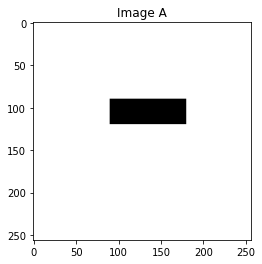

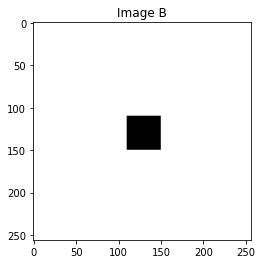

In [191]:
A=np.zeros((256,256), dtype=np.uint8)+255     #On met les autres pixels à 255 (fond blanc) comme valeur par défaut
B=np.zeros((256,256), dtype=np.uint8)+255

for i in range (110,150):
  for j in range (110,150):
    B[i,j]=0

for i in range (90,120):
  for j in range (90,180):
    A[i,j]=0

plt.plot(1,2,1)
plt.imshow(A, cmap='gray')
plt.title('Image A')
plt.show()

plt.plot(1,2,2)
plt.imshow(B, cmap='gray')
plt.title('Image B')
plt.show()

1/ Réalisation des opérations logiques:

Text(0.5, 1.0, 'Image A XOR B')

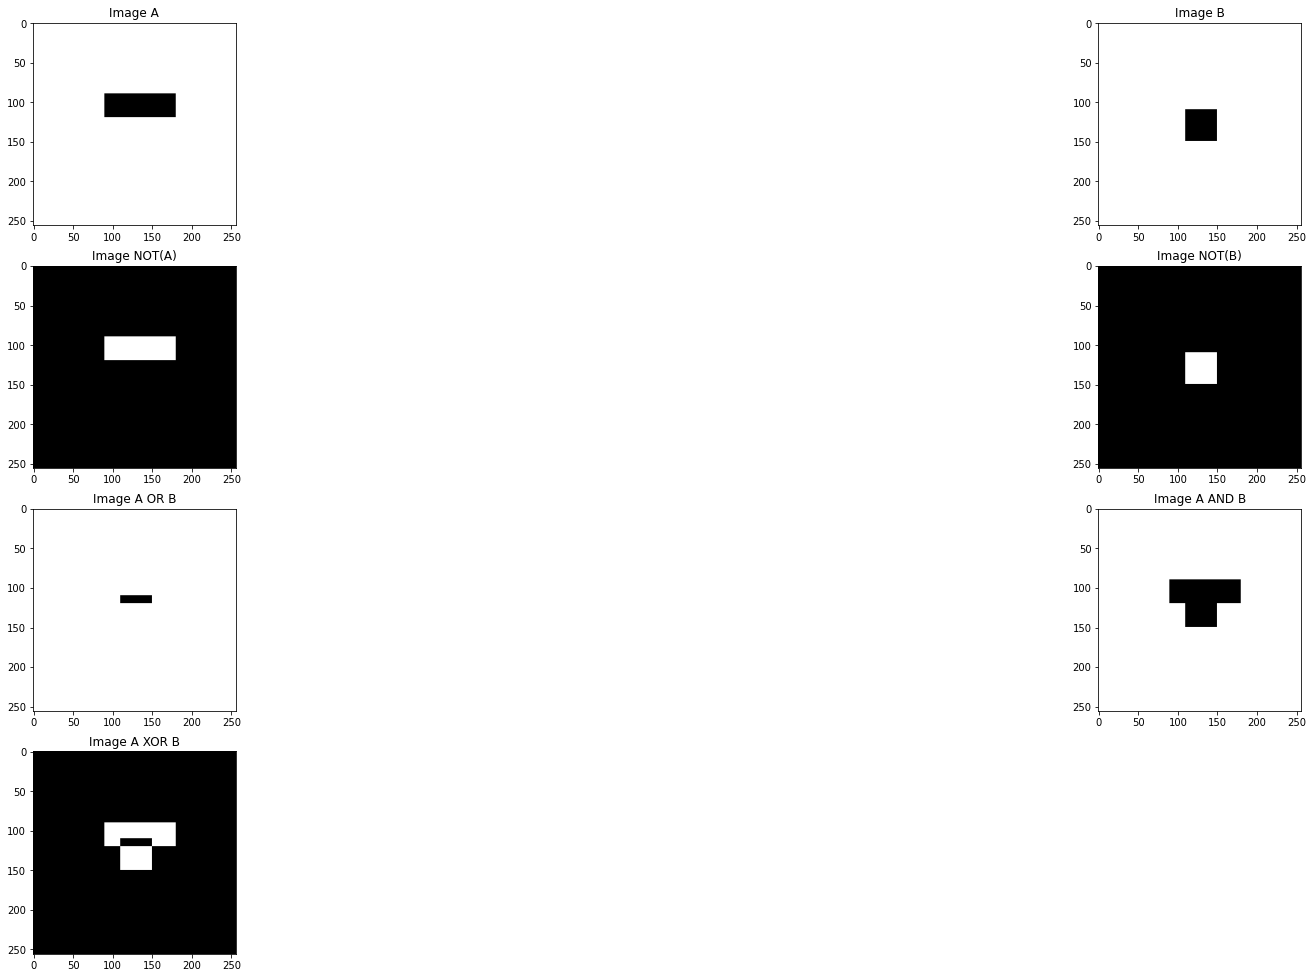

In [192]:
plt.figure(figsize=(35, 35))           #Réajuster la visualisation de l'image

not_A=cv.bitwise_not(A)
not_B=cv.bitwise_not(B)
imOR=cv.bitwise_or(A,B)
imAND=cv.bitwise_and(A,B)
imXOR=cv.bitwise_xor(A,B)

plt.subplot(8,2,1)
plt.imshow(A, cmap='gray')
plt.title('Image A')

plt.subplot(8,2,2)
plt.imshow(B, cmap='gray')
plt.title('Image B')

plt.subplot(8,2,3)
plt.imshow(not_A, cmap='gray')
plt.title('Image NOT(A)')

plt.subplot(8,2,4)
plt.imshow(not_B, cmap='gray')
plt.title('Image NOT(B)')

plt.subplot(8,2,5)
plt.imshow(imOR, cmap='gray')
plt.title('Image A OR B')

plt.subplot(8,2,6)
plt.imshow(imAND, cmap='gray')
plt.title('Image A AND B')

plt.subplot(8,2,7)
plt.imshow(imXOR, cmap='gray')
plt.title('Image A XOR B')

**Analyse et interprétation:** </br> Dans le cas des opérations logiques sur les images, elles s'effectuent en suivant bit par bit, ce qui veut dire on exprime chaque valeur de niveau de gris en binaire et on fait l'opération logique adéquate avec la valeur du niveau du gris du pixel dans la même position de l'autre image, ce qui donne les résultats qu'on a obtenu.</br>
Par contre, on remarque une incohérence avec la signification intuitive des opérations logiques; pour l'image experimant le OR on a eu le résultat intuitif du AND, de même pour le OR et pour le AND. </br>
Donc enfin on dit que la calcul a été correctement fait mais les résultats sont incohérents.

2/ Génération des images et interprétation:

Text(0.5, 1.0, 'Image Ai XOR Bi')

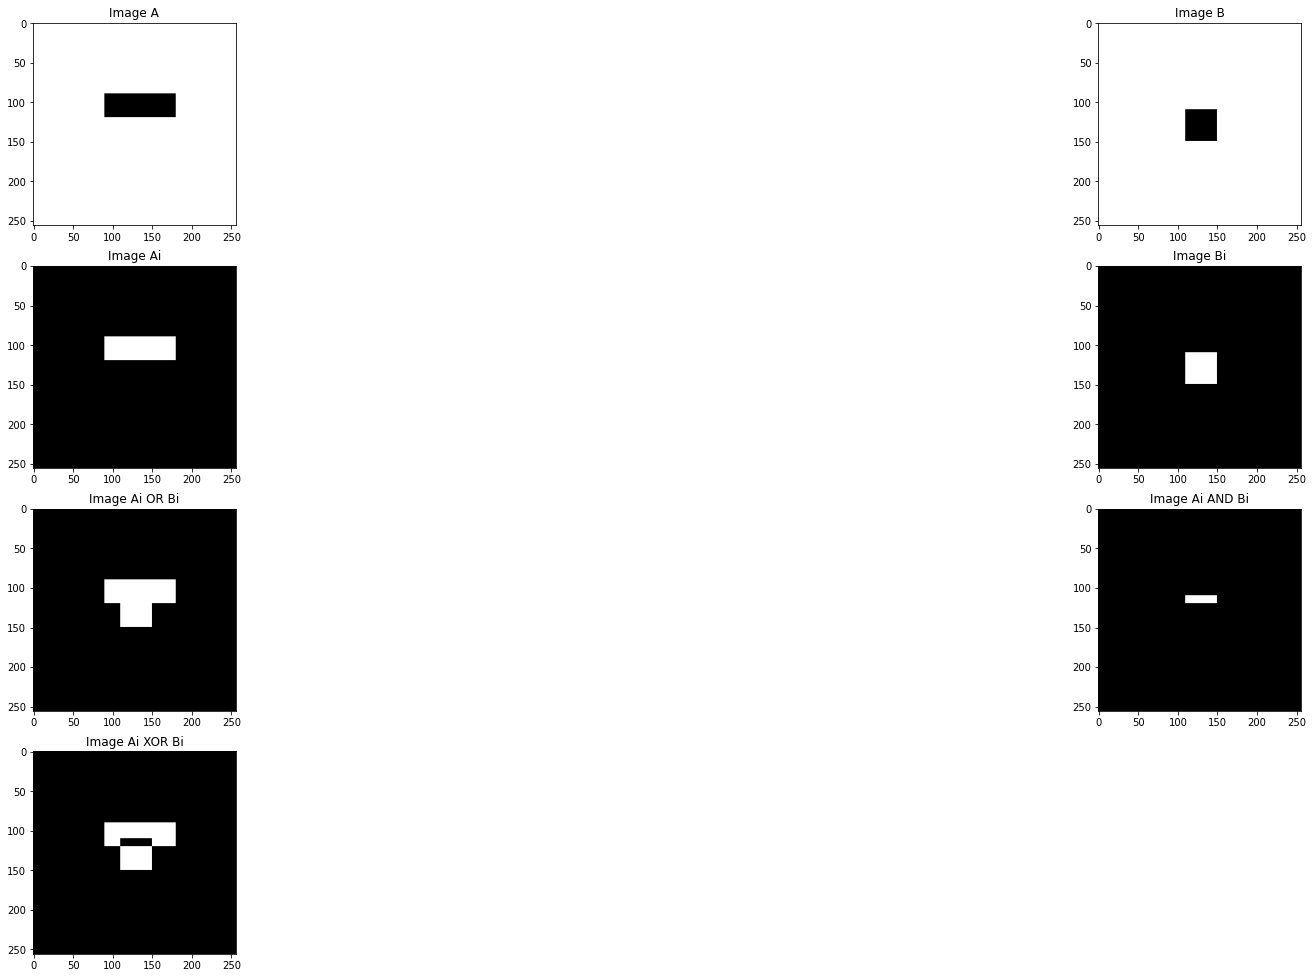

In [194]:
plt.figure(figsize=(35, 35))   #Réajustement

Ai=cv.bitwise_not(A)
Bi=cv.bitwise_not(B)
imANDi=cv.bitwise_and(Ai,Bi)
imORi=cv.bitwise_or(Ai,Bi)
imXORi=cv.bitwise_xor(Ai,Bi)

plt.subplot(8,2,1)
plt.imshow(A, cmap='gray')
plt.title('Image A')

plt.subplot(8,2,2)
plt.imshow(B, cmap='gray')
plt.title('Image B')

plt.subplot(8,2,3)
plt.imshow(Ai, cmap='gray')
plt.title('Image Ai')

plt.subplot(8,2,4)
plt.imshow(Bi, cmap='gray')
plt.title('Image Bi')

plt.subplot(8,2,5)
plt.imshow(imORi, cmap='gray')
plt.title('Image Ai OR Bi')

plt.subplot(8,2,6)
plt.imshow(imANDi, cmap='gray')
plt.title('Image Ai AND Bi')

plt.subplot(8,2,7)
plt.imshow(imXORi, cmap='gray')
plt.title('Image Ai XOR Bi')

**Comparaison avec les résultats précédents:** </br>
Après avoir inversé les images A et B (par un NOT logique), on obtient des résultats cohérents, un AND reflète un AND (intersection) et pas un OR (union) de même pour le OR sur les images.</br>On remarque aussi que le XOR reste inchangé entre les 2 opérations car son résultat dépend des différences des valeurs entre les 2 opérandes (lors de l'inversion par le NOT, cette différence reste conservée et donc on obtient le même résultat du XOR).

3/ Amélioration: 

Pour avoir un résultat cohérent avec les opérateurs appliqués, on doit donner en entrée de ces opérateurs des images qui ont les motifs en blanc sur un fond noir pour éviter toute incohérence comme vu lors de la 2ème question.</br>
Il faut noter que cette condition n'est vérifiable que dans le cas d'une image binaire, pour les autres images, la notion de cohérence avec l'opérateur perd sa pertinence.</br> </br>
Et donc enfin pour obtenir des résultats cohérents, il faut être dans des images binaires, de mêmes dimensions et les motifs en blanc sur fond noir.

# **Manipulation 3**

1/ Lecture et affichage de l'image:

Text(0.5, 1.0, 'Image BoatsColor.bmp')

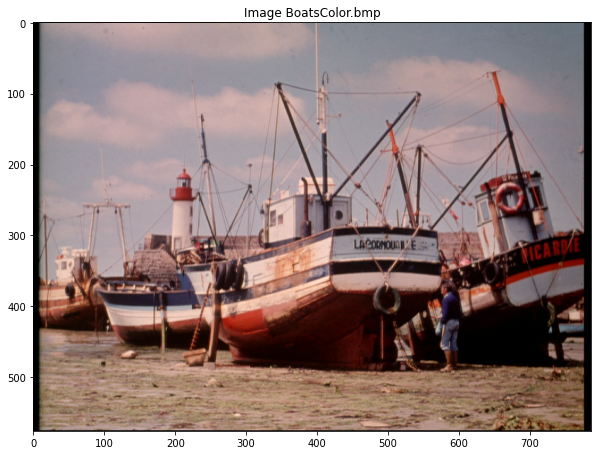

In [195]:
plt.figure(figsize=(10, 10))   #Réajustement

image=cv.imread('BoatsColor.bmp')
Image=cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(Image)
plt.title('Image BoatsColor.bmp')

2/ Comparaison entre les 3 types d'interpolation:

2/a Translater l'image de 35 pixels vers le bas et de 10 vers la droite:

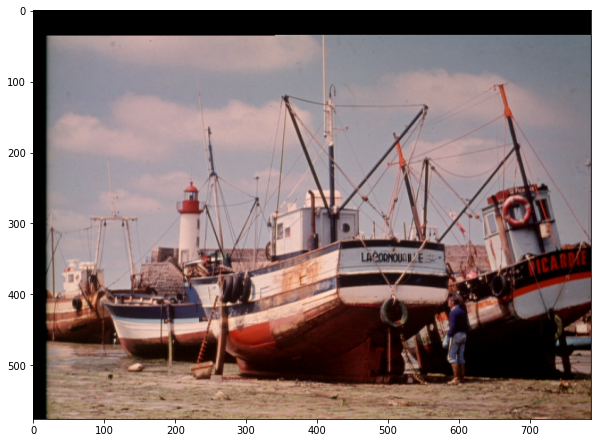

In [196]:
plt.figure(figsize=(10, 10))   #Réajustement

# La translation avec des valeurs entières ne pose aucune problématique d'interpolation, la translation est simple

rows,cols=Image.shape[0],Image.shape[1]

M=np.float32([[1,0,10],[0,1,35]])
im_trans=cv.warpAffine(Image,M,(cols,rows))    # Fonction adéquate pour réaliser la translation

plt.imshow(im_trans)

Comme on le remarque, aucun problème d'interpolation ne se pose; il y a toujours le fait que chaque pixel retomber sur un pixel de l'image résultante et jamais entre les 2 et ce est dû aux valeurs entières de translation.

2/b Redimensionnement de l'image (diviser largeur par 2 et hauteur par 1.5):

Text(0.5, 1.0, 'Image après redimensionnement')

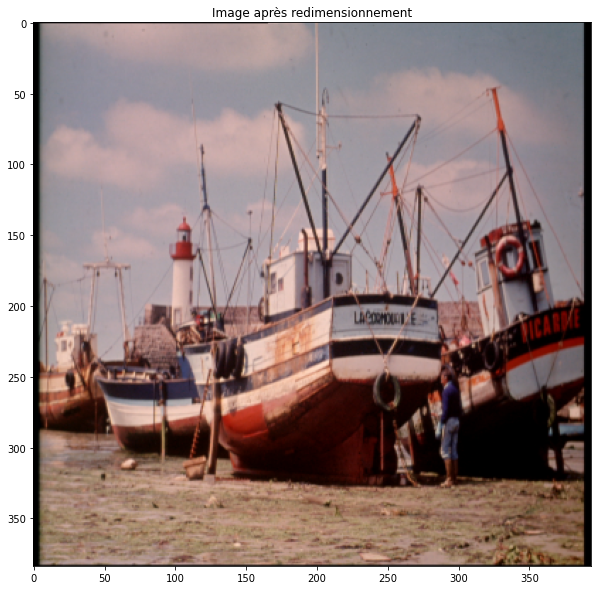

In [197]:
plt.figure(figsize=(10, 10))   #Réajustement

Hauteur=Image.shape[0]/1.5
Largeur=Image.shape[1]/2
im_redim=resize(Image, (Hauteur, np.round(Largeur)), anti_aliasing=True)   # La fonction utilisé pour le redimensionnement
plt.imshow(im_redim)
plt.title('Image après redimensionnement')

3/b Pivoter l'image d'un angle de 60 degrès:

Text(0.5, 1.0, 'Image pivotée de 60 degrès')

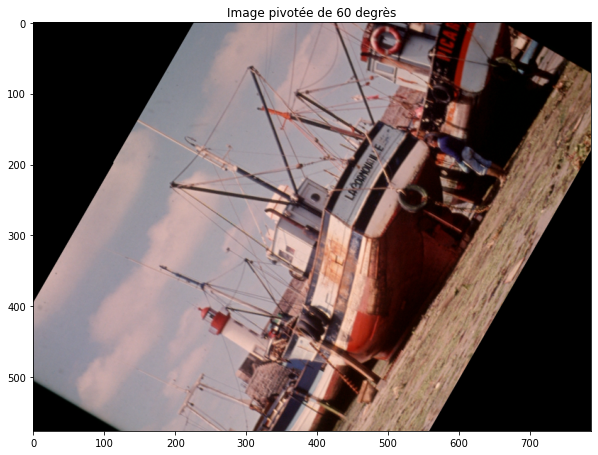

In [198]:
plt.figure(figsize=(10, 10))   #Réajustement

im_rot=rotate(Image, 60)    #Fonction pour faire pivoter l'image de 60 degrès
plt.imshow(im_rot)
plt.title('Image pivotée de 60 degrès')